In [ ]:
#%pip install psycopg2
import psycopg2 #biblioteca para conectar ao banco
import pandas as pd #biblioteca para criação e gerenciamento de data frame. Também utilizada para exportar o dataframe para csv
import pandas.io.sql as sqlio #utilizado para integrar o sql com pandas, permitindo exportar os dados direto do banco para um dataframe

from functools import reduce

conn = psycopg2.connect(    #estabelece os parametros a serem utilizados para fazer a conexão ao banco de dados
    database="conectcar",
    user="matheus_marques", #seu usuário
    password="@Tcn123#!Conect", #sua senha
    host="sdlf-cntcar-redshift-dev.capkkn406tig.us-east-2.redshift.amazonaws.com",
    port='5439'
)

fd = open('score_m1.sql', 'r', encoding="utf8")
sql = fd.read()
fd.close()


dataframe = sqlio.read_sql_query(sql, conn) #exporta os dados do banco, obtidos via a consulta do sql, para um dataframe
print(dataframe) #mostra no terminal as colunas e linhas obtidos na consulta

fd = open('score_m2.sql', 'r', encoding="utf8")
sql = fd.read()
fd.close()


dataframe2 = sqlio.read_sql_query(sql, conn) #exporta os dados do banco, obtidos via a consulta do sql, para um dataframe
print(dataframe2) #mostra no terminal as colunas e linhas obtidos na consulta

fd = open('score_m3.sql', 'r', encoding="utf8")
sql = fd.read()
fd.close()


dataframe3 = sqlio.read_sql_query(sql, conn) #exporta os dados do banco, obtidos via a consulta do sql, para um dataframe
print(dataframe3) #mostra no terminal as colunas e linhas obtidos na consulta

C:\Users\matheus.marques\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


        documento_m1  clienteid_m1  saldoid_m1  adesaoid       cobranca_m1  \
0            3692507       2485930    24559372   6463087      sem cobranca   
1            3787710       2184102    24291136   7504434  mensalidade paga   
2            5496659       1352431    23724004   5611892  mensalidade paga   
3            5496659       1352431    23724004   4492550  mensalidade paga   
4            6377777       2060324    24183412   6838398            isento   
...              ...           ...         ...       ...               ...   
313103   99861453687        898852    20492467   3326417  mensalidade paga   
313104   99883694920       1461381    23540006   4796652  mensalidade paga   
313105   99909952068       2354990    24443253   6150095            isento   
313106   99944154849       1274171    23643032   4247393      sem cobranca   
313107   99959275868       1980147    24111394   5339559  mensalidade paga   

        ultimosaldonomes_m1  errosrecarga_m1  tickets_m1  saldo

C:\Users\matheus.marques\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [42]:


dfs = [dataframe, dataframe2, dataframe3]

df = reduce(lambda  left,right: pd.merge(left,right,on=['adesaoid'],
                                            how='outer'), dfs)
df = df.fillna(0) 



In [43]:
df['cepscore_m1'] = (df["qtdfaturadocep_m1"]/df["totalmensalidadecep_m1"])*100
df['binscore_m1'] = (df["qtdfaturadobin_m1"]/df["totalmensalidadebin_m1"])*100
df['cepscore_m2'] = (df["qtdfaturadocep_m2"]/df["totalmensalidadecep_m2"])*100
df['binscore_m2'] = (df["qtdfaturadobin_m2"]/df["totalmensalidadebin_m2"])*100
df['cepscore_m3'] = (df["qtdfaturadocep_m3"]/df["totalmensalidadecep_m3"])*100
df['binscore_m3'] = (df["qtdfaturadobin_m3"]/df["totalmensalidadebin_m3"])*100

 #dropa colunas que não serão mais utilizadas
df=df.drop(columns=['qtdfaturadocep_m1', 'totalmensalidadecep_m1','qtdfaturadobin_m1','totalmensalidadebin_m1','qtdfaturadocep_m2', 'totalmensalidadecep_m2','qtdfaturadobin_m2','totalmensalidadebin_m2','qtdfaturadocep_m3', 'totalmensalidadecep_m3','qtdfaturadobin_m3','totalmensalidadebin_m3'])


In [56]:
df=df.fillna(0) 
print(dataframe)

        documento_m1  clienteid_m1  saldoid_m1  adesaoid       cobranca_m1  \
0            3692507       2485930    24559372   6463087      sem cobranca   
1            3787710       2184102    24291136   7504434  mensalidade paga   
2            5496659       1352431    23724004   4492550  mensalidade paga   
3            5496659       1352431    23724004   5611892  mensalidade paga   
4            6377777       2060324    24183412   6838398            isento   
...              ...           ...         ...       ...               ...   
313130   99942178287       2378619    24513039   6338105  mensalidade paga   
313131   99971682672       1966958    24096394   5327702  mensalidade paga   
313132   99973537149       2374939    24461437   6200892  mensalidade paga   
313133   99977087849       1273618    23339371   3478190  mensalidade paga   
313134   99993449091       1620847    23716914   4470434            isento   

        ultimosaldonomes_m1  errosrecarga_m1  tickets_m1  saldo

In [72]:
dataframe = dataframe.fillna(0) 
 
linhasdf = len(dataframe.index)
linhasdftop = linhasdf*2/10
linhasdfbot = linhasdf*8/10

linhasdftop = round(linhasdftop)
linhasdfbot = round(linhasdfbot)

dataframe = dataframe.fillna(0)
dfmedianarod = dataframe.sort_values(by=['passagensrodovias_m1'], ascending=True)
print(dfmedianarod)
dfmedianarod = dfmedianarod.loc[linhasdftop:linhasdfbot+1]
medianarod = dfmedianarod['passagensrodovias_m1'].quantile([0.25, 0.5, 0.75])
print(medianarod)


        documento_m1  clienteid_m1  saldoid_m1  adesaoid       cobranca_m1  \
0            3692507       2485930    24559372   6463087      sem cobranca   
176108   24749375870        851533    19737694   6402775  mensalidade paga   
176113   24786276987       2033843    24158824   5455203  mensalidade paga   
176115   24791618890       1515619    23595211   4089973      sem cobranca   
176116   24798785890       1293808    23367501   3531120  mensalidade paga   
...              ...           ...         ...       ...               ...   
8092      3025819952       1296332    23364878   7097788  mensalidade paga   
225851   32099821801       1607208    23698555   5742094  mensalidade paga   
23699     3025819952       1296332    23364878   7670254  mensalidade paga   
58975     8331116984       1267717    23434292   6660599  mensalidade paga   
219796   31453777873       1252063    23315716   7167967            isento   

        ultimosaldonomes_m1  errosrecarga_m1  tickets_m1  saldo

In [50]:
dataframe2 = dataframe2.fillna(0) 
linhasdf = len(dataframe2.index)
linhasdftop = linhasdf*2/10
linhasdfbot = linhasdf*8/10
linhasdftop = round(linhasdftop)
linhasdfbot = round(linhasdfbot)

dataframe2 = dataframe2.fillna(0) 
dfmedianarod2 = dataframe2.sort_values(by=['passagensrodovias_m2'], ascending=True)

dfmedianarod2 = dfmedianarod2.loc[linhasdftop:linhasdfbot+1]
medianarod2 = dfmedianarod2['passagensrodovias_m2'].quantile([0.25, 0.5, 0.75])





0.25    16.0
0.50    20.0
0.75    24.0
Name: passagensrodovias_m2, dtype: float64

In [73]:
dataframe = dataframe.fillna(0) 
 
linhasdf = len(dataframe3.index)
linhasdftop = linhasdf*2/10
linhasdfbot = linhasdf*8/10
linhasdftop = round(linhasdftop)
linhasdfbot = round(linhasdfbot)

dataframe3 = dataframe3.fillna(0)
dfmedianarod3 = dataframe3.sort_values(by=['passagensrodovias_m3'], ascending=True)
print(dfmedianarod3)
dfmedianarod3 = dfmedianarod3.loc[linhasdftop:linhasdfbot+1]
medianarod3 = dfmedianarod3['passagensrodovias_m3'].quantile([0.25, 0.5, 0.75])



#alterar transits 10 20 30 40
#estacionamento 5 10 15 20
#rodovia 25 50 75 100

        documento_m3  clienteid_m3  saldoid_m3  adesaoid       cobranca_m3  \
0             172642       1691007    23785464   4706647      sem cobranca   
171500   22165078814       2204418    24308599   5823816            isento   
171501   22167596863       2790959    24838524   7493739      sem cobranca   
171506   22173232886        103985    20041099   3146239  mensalidade paga   
171507   22174950898       1206559    23263331   3305075      sem cobranca   
...              ...           ...         ...       ...               ...   
195935   28924137883       1075367    23106412   6497391            isento   
273912   39564891876        281195    10789736   6797958  mensalidade paga   
67617     3025819952       1296332    23364878   7097788  mensalidade paga   
241427   31453777873       1252063    23315716   7167967            isento   
192160   28924137883       1075367    23106412   7058093            isento   

        ultimosaldonomes_m3  errosrecarga_m3  tickets_m3  saldo

In [71]:
print(medianarod)
print(medianarod2)
print(medianarod3)

0.25   NaN
0.50   NaN
0.75   NaN
Name: passagensrodovias_m1, dtype: float64
0.25   NaN
0.50   NaN
0.75   NaN
Name: passagensrodovias_m2, dtype: float64
0.25     0.0
0.50     4.0
0.75    11.0
Name: passagensrodovias_m3, dtype: float64


In [82]:
def cobranca(x):
    if x=='mensalidade paga' or x=='isento':
        return 30
    else:
        return 0
    
def saldo(x):
    if x>=30:
        return 20
    else:
        return 0

def errosrecarga(x):
    if x>=15.75:
        return 0
    elif x>=10.5:
        return 2.5
    elif x>=5.25:
        return 5
    elif x>=0:
        return 7.5
    elif x==0:
        return 10

def tickets(x):
    if x>=33.75:
        return 0
    elif x>=22.5:
        return 2.5
    elif x>=11.25:
        return 5
    elif x>=0:
        return 7.5
    elif x==0:
        return 10


def cep(x):
    if x==0:
        return 0
    elif x<=25:
        return 2.5
    elif x<=50:
        return 5
    elif x<=75:
        return 7.5
    elif x<=100:
        return 10


def bincartao(x):
    if x==0:
        return 0
    elif x<=25:
        return 2.5
    elif x<=50:
        return 5
    elif x<=75:
        return 7.5
    elif x<=100:
        return 10
    
def passagensrodovias(x):
    if x==0:
        return 0
    elif x<=25:
        return 2.5
    elif x<=50:
        return 5
    elif x<=75:
        return 7.5
    elif x>75:
        return 10

def passagensestacionamento(x):
    if x==0:
        return 0
    elif x<=5:
        return 2.5
    elif x<=10:
        return 5
    elif x<=15:
        return 7.5
    elif x>15:
        return 10
    
def passagenstransits(x):
    if x==0:
        return 0
    elif x<=10:
        return 2.5
    elif x<=20:
        return 5
    elif x<=30:
        return 7.5
    elif x>30:
        return 10


In [83]:
df['cobranca_m1'] = df["cobranca_m1"].apply(cobranca)
df['ultimosaldonomes_m1'] = df["ultimosaldonomes_m1"].apply(saldo)
df['errosrecarga_m1'] = df["errosrecarga_m1"].apply(errosrecarga)
df['tickets_m1'] = df["tickets_m1"].apply(tickets)
df['saldoatual_m1'] = df["saldoatual_m1"].apply(saldo)
df['passagensrodovias_m1'] = df["passagensrodovias_m1"].apply(passagensrodovias)
df['passagensestacionamento_m1'] = df["passagensestacionamento_m1"].apply(passagensestacionamento)
df['passagenstransits_m1'] = df["passagenstransits_m1"].apply(passagenstransits)
df['cepscore_m1'] = df["cepscore_m1"].apply(cep)
df['binscore_m1'] = df["binscore_m1"].apply(bincartao)
df['cobranca_m2'] = df["cobranca_m2"].apply(cobranca)
df['ultimosaldonomes_m2'] = df["ultimosaldonomes_m2"].apply(saldo)
df['errosrecarga_m2'] = df["errosrecarga_m2"].apply(errosrecarga)
df['tickets_m2'] = df["tickets_m2"].apply(tickets)
df['saldoatual_m2'] = df["saldoatual_m2"].apply(saldo)
df['passagensrodovias_m2'] = df["passagensrodovias_m2"].apply(passagensrodovias)
df['passagensestacionamento_m2'] = df["passagensestacionamento_m2"].apply(passagensestacionamento)
df['passagenstransits_m2'] = df["passagenstransits_m2"].apply(passagenstransits)
df['cepscore_m2'] = df["cepscore_m2"].apply(cep)
df['binscore_m2'] = df["binscore_m2"].apply(bincartao)
df['cobranca_m3'] = df["cobranca_m3"].apply(cobranca)
df['ultimosaldonomes_m3'] = df["ultimosaldonomes_m3"].apply(saldo)
df['errosrecarga_m3'] = df["errosrecarga_m3"].apply(errosrecarga)
df['tickets_m3'] = df["tickets_m3"].apply(tickets)
df['saldoatual_m3'] = df["saldoatual_m3"].apply(saldo)
df['passagensrodovias_m3'] = df["passagensrodovias_m3"].apply(passagensrodovias)
df['passagensestacionamento_m3'] = df["passagensestacionamento_m3"].apply(passagensestacionamento)
df['passagenstransits_m3'] = df["passagenstransits_m3"].apply(passagenstransits)
df['cepscore_m3'] = df["cepscore_m3"].apply(cep)
df['binscore_m3'] = df["binscore_m3"].apply(bincartao)

print(df)

        documento_m1  clienteid_m1  saldoid_m1  adesaoid  cobranca_m1  \
0          6377777.0     2060324.0  24183412.0   5517454           30   
1          9351663.0      428446.0  20321442.0   3880523           30   
2         11864699.0     1032829.0  23052183.0   4507473           30   
3         12586641.0      748415.0  16661029.0   4876451           30   
4         14485524.0     2186806.0  24294746.0   6116752           30   
...              ...           ...         ...       ...          ...   
359381           0.0           0.0         0.0   3409013            0   
359382           0.0           0.0         0.0   3972216            0   
359383           0.0           0.0         0.0   3482541            0   
359384           0.0           0.0         0.0   6775082            0   
359385           0.0           0.0         0.0   3208758            0   

        ultimosaldonomes_m1  errosrecarga_m1  tickets_m1  saldoatual_m1  \
0                         0              7.5    

In [84]:
df['SCORE_CLIENTE'] = df['cobranca_m1']+df['ultimosaldonomes_m1']+df['errosrecarga_m1']+df['tickets_m1']+df['saldoatual_m1']+df['passagensrodovias_m1']+df['passagensestacionamento_m1']+df['passagenstransits_m1']+df['cepscore_m1']+df['binscore_m1']+df['cobranca_m2']+df['ultimosaldonomes_m2']+df['errosrecarga_m2']+df['tickets_m2']+df['passagensrodovias_m2']+df['passagensestacionamento_m2']+df['passagenstransits_m2']+df['cepscore_m2']+df['binscore_m2']+df['cobranca_m3']+df['ultimosaldonomes_m3']+df['errosrecarga_m3']+df['tickets_m3']+df['passagensrodovias_m3']+df['passagensestacionamento_m3']+df['passagenstransits_m3']+df['cepscore_m3']+df['binscore_m3']


In [85]:
print(df)

        documento_m1  clienteid_m1  saldoid_m1  adesaoid  cobranca_m1  \
0          6377777.0     2060324.0  24183412.0   5517454           30   
1          9351663.0      428446.0  20321442.0   3880523           30   
2         11864699.0     1032829.0  23052183.0   4507473           30   
3         12586641.0      748415.0  16661029.0   4876451           30   
4         14485524.0     2186806.0  24294746.0   6116752           30   
...              ...           ...         ...       ...          ...   
359381           0.0           0.0         0.0   3409013            0   
359382           0.0           0.0         0.0   3972216            0   
359383           0.0           0.0         0.0   3482541            0   
359384           0.0           0.0         0.0   6775082            0   
359385           0.0           0.0         0.0   3208758            0   

        ultimosaldonomes_m1  errosrecarga_m1  tickets_m1  saldoatual_m1  \
0                         0              7.5    

In [32]:
df.to_csv("score_cliente_v3.csv") 


In [ ]:
#parte da analise

In [87]:
#dataframe = dataframe.fillna(0) 
analise = df.groupby(['SCORE_CLIENTE']).size().reset_index(name='counts')
print(analise)
#analise.drop(analise[analise['passagensrodovias_m3'] > 300].index, inplace = True)
#print(analise)

     SCORE_CLIENTE  counts
0             42.5       4
1             45.0    1818
2             47.5      29
3             50.0      49
4             52.5     784
..             ...     ...
113          325.0     250
114          327.5     302
115          330.0     189
116          332.5     137
117          335.0     101

[118 rows x 2 columns]


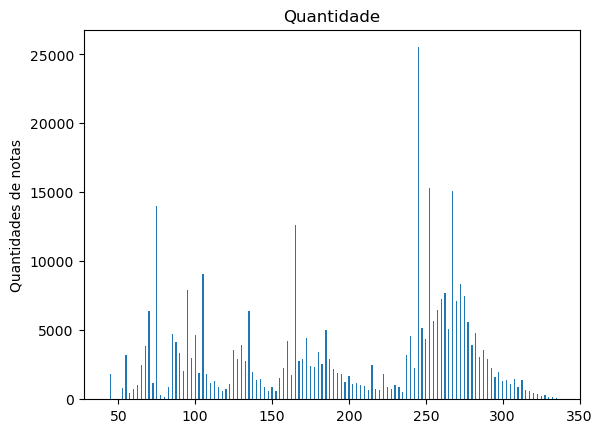

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()



ax.bar(analise['SCORE_CLIENTE'],analise['counts'])

ax.set_ylabel('Quantidades de notas')
ax.set_title('Quantidade')


plt.show()